In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Interactive Clinical Gait Report  

In [9]:
# -*- coding: utf-8 -*-
import os
import matplotlib.pyplot as plt

# pyCGM2 settings
import pyCGM2

# pyCGM2 libraries
from pyCGM2.Tools import btkTools
from pyCGM2.Report import plot,plotFilters,plotViewers,normativeDatasets
from pyCGM2.Processing import c3dManager,exporter,scores
from pyCGM2.Processing.highLevel import gaitSmartFunctions
from pyCGM2.Utils import files

from pyCGM2.apps.CGM_Pipeline import Pipeline,pipManager



In [4]:
ModellingConfig = """
    {
        "PipelineVersion": "pipe-V-1.0",
        "DATA_PATH":"C:/Users/HLS501/Documents/VICON DATA/pyCGM2-Data/Datasets Tests/didier/08_02_18_Vincent Pere/",
        "OutDataPath":"",
        "Subject": {
            "Id": "PV"
        },
        "ExperimentalContext": {
            "sessionName": "S01",
            "AssessorName": "OP"
        },
        "Modelling": {
            "ModelVersion": "CGM2.4",
            "ModelInfo": {
                "Model": "CGM2.4"
            },
            "fileSuffix": "cgm24",
            "pointSuffix": "",
            "MarkerDiameter": 14,
            "MP": {
                "Required": {
                    "Bodymass": 70,
                    "Height": 1700,
                    "LeftLegLength": 890,
                    "RightLegLength": 890,
                    "LeftKneeWidth": 150,
                    "RightKneeWidth": 150,
                    "LeftAnkleWidth": 88,
                    "RightAnkleWidth": 99,
                    "LeftSoleDelta": 0,
                    "RightSoleDelta": 0
                },
                "Optional": {
                    "InterAsisDistance": 0,
                    "LeftAsisTrocanterDistance": 0,
                    "LeftTibialTorsion": 0,
                    "LeftThighRotation": 0,
                    "LeftShankRotation": 0,
                    "RightAsisTrocanterDistance": 0,
                    "RightTibialTorsion": 0,
                    "RightThighRotation": 0,
                    "RightShankRotation": 0,
                    "LeftKneeFuncCalibrationOffset": 0,
                    "RightKneeFuncCalibrationOffset": 0
                }
            },
            "NoIK": 1,
            "Calibration": {
                "LeftFlatFoot": 1,
                "RightFlatFoot": 1,
                "Trial": "08_02_18_Vincent_Pere_Statique_000_MOKKA.c3d"
            },
            "KneeCalibrationTrials": {
                "Left": {
                    "Method": "NONE",
                    "Trial": ".c3d",
                    "BeginFrame": 0,
                    "EndFrame": 0
                },
                "Right": {
                    "Method": "NONE",
                    "Trial": "",
                    "BeginFrame": 0,
                    "EndFrame": 0
                }
            },
            "Fitting": {
                "IkweightFile":"",
                "Trials": [
                    {   "File": "08_02_18_Vincent_Pere_Gait_000_MOKKA.c3d", "Mfpa": "XX"}
                        ],
                "Projection": "JCS"
            }
        }
    }
"""


manager = pipManager.PipelineFileManager(None,None,stringContent = ModellingConfig)

DATA_PATH = manager.getDataPath() 

DATA_PATH_OUT = DATA_PATH if manager.getOutDataPath() is None else manager.getOutDataPath()
if manager.getOutDataPath() is not None:
    files.createDir(DATA_PATH_OUT)


In [5]:

Pipeline.modelling(manager,DATA_PATH,DATA_PATH_OUT)

[pyCGM2-INFO]-Pipeline-modelling : model version : CGM2.4
[pyCGM2-INFO]-Pipeline-modelling : mp from pipeline file
[pyCGM2-WARNING]-cgmUtils-applyDecorators_CGM : CASE FOUND ===> Left Side = Knee and Ankle Medial
[pyCGM2-WARNING]-cgmUtils-applyDecorators_CGM : CASE FOUND ===> Right Side = Knee and Ankle Medial
[pyCGM2-INFO]-Pipeline-modelling : Static Calibration -----> Done
[pyCGM2-INFO]-cgm2_4-fitting : Force plate assignment : XX
[pyCGM2-WARNING]-cgm2_4-fitting : Force plates assign manually
[pyCGM2-INFO]-Pipeline-modelling : Fitting -----> Done
[pyCGM2-INFO]-Pipeline-modelling : c3d file (08_02_18_Vincent_Pere_Gait_000_MOKKA-modelled-cgm24.c3d) generated


## Gait Processing 

### Aalysis 1 - Spontaeous Gait

In [16]:

modelledFiles = ["08_02_18_Vincent_Pere_Gait_000_MOKKA-modelled-cgm24.c3d"]
modelInfo = None
subjectInfo = None
experimentalInfo = None
modelVersion= "CGM2.4"
pointSuffix=""

# analysis constructor-------
c3dmanagerProcedure = c3dManager.UniqueC3dSetProcedure(DATA_PATH,modelledFiles)
cmf = c3dManager.C3dManagerFilter(c3dmanagerProcedure)
cmf.enableEmg(False)
trialManager = cmf.generate()

analysis = gaitSmartFunctions.make_analysis(trialManager,
      None,
      None,
      modelInfo, subjectInfo, experimentalInfo,
      modelVersion = "CGM2.4",
      pointLabelSuffix=pointSuffix)
# end analysis -------

normativeDataset = normativeDatasets.Schwartz2008("Free")

gps =scores.CGM1_GPS(pointSuffix= pointSuffix)
scf = scores.ScoreFilter(gps,analysis, normativeDataset)
scf.compute()

[pyCGM2-INFO]-analysis-computeSpatioTemporel : --stp computation--
[pyCGM2-INFO]-analysis-computeSpatioTemporel : left stp computation---> done
[pyCGM2-INFO]-analysis-computeSpatioTemporel : right stp computation---> done
[pyCGM2-INFO]-analysis-computeKinematics : --kinematic computation--
[pyCGM2-INFO]-analysis-computeKinematics : left kinematic computation---> done
[pyCGM2-INFO]-analysis-computeKinematics : right kinematic computation---> done
[pyCGM2-INFO]-analysis-computeKinetics : --kinetic computation--
[pyCGM2-WARNING]-analysis-computeKinetics : No Kinetic computation


#### Spatio-temporal parameters

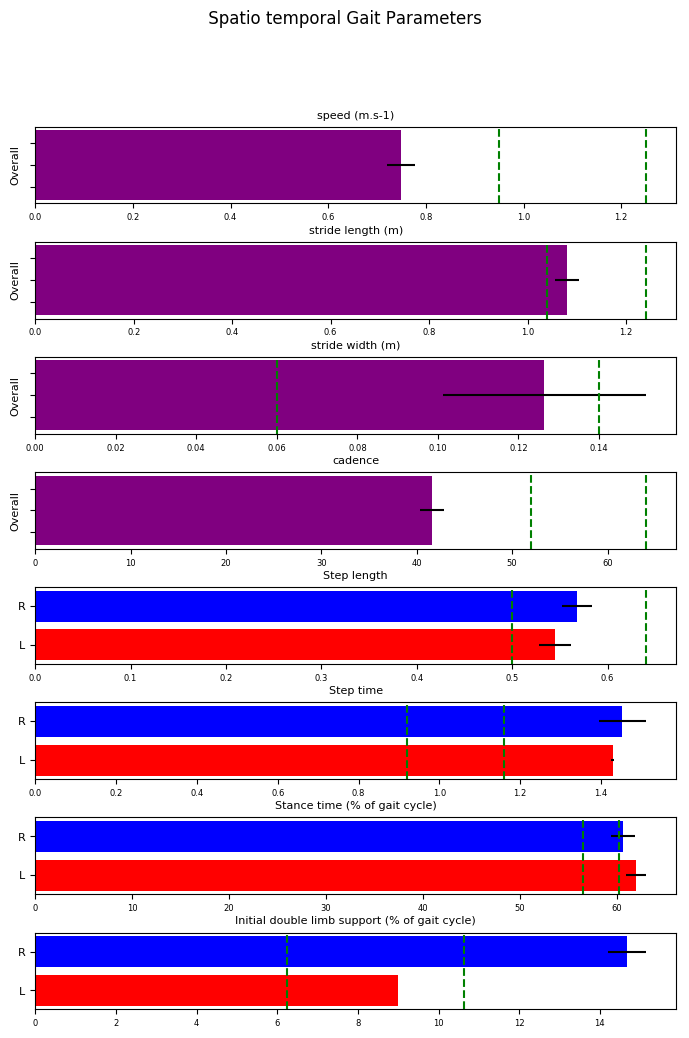

In [13]:
stpv = plotViewers.SpatioTemporalPlotViewer(analysis)
stpv.setNormativeDataset(normativeDatasets.NormalSTP())

# filter
stppf = plotFilters.PlottingFilter()
stppf.setViewer(stpv)
stppf.plot()

plt.show()

In [ ]:
#### Movement Analysis Profile

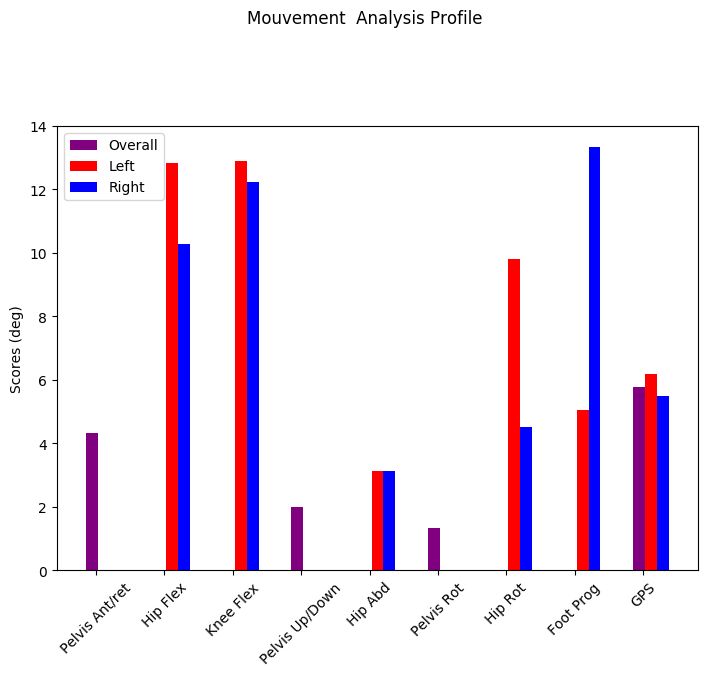

In [18]:



kv = plotViewers.GpsMapPlotViewer(analysis)
# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

#### Kinematic Trace

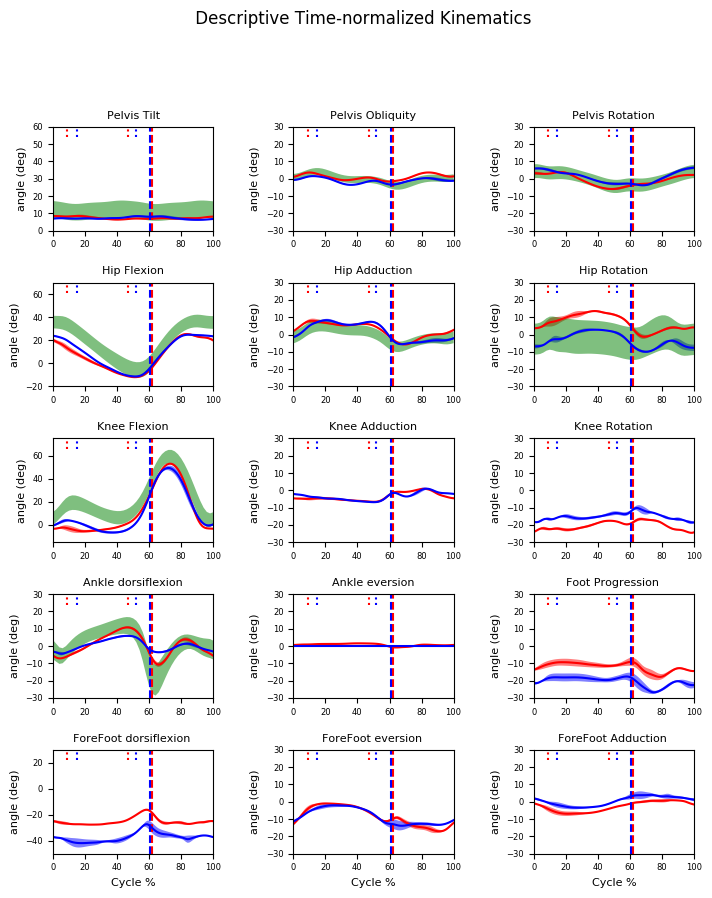

In [11]:
kv = plotViewers.LowerLimbMultiFootKinematicsPlotViewer(analysis,
                    pointLabelSuffix=pointSuffix)

kv.setConcretePlotFunction(plot.gaitDescriptivePlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()

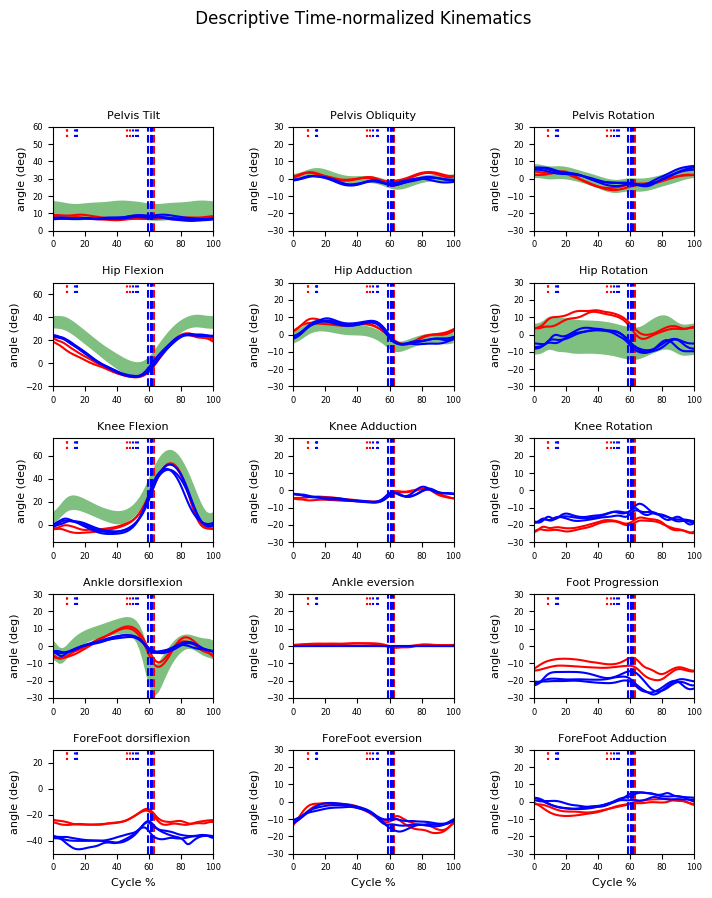

In [12]:
kv = plotViewers.LowerLimbMultiFootKinematicsPlotViewer(analysis,
                    pointLabelSuffix=pointSuffix)

kv.setConcretePlotFunction(plot.gaitConsistencyPlot)
kv.setNormativeDataset(normativeDataset)

# filter
pf = plotFilters.PlottingFilter()
pf.setViewer(kv)
pf.plot()

plt.show()